# IMPORTING THE LIBRARY

### You are required to build a machine learning model that would predict the political party to which a taxpayer belongs to.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# DATA LOADING

In [2]:
tax_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv" )
tax_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


In [3]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')
test_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,17,253274,-633752,2,1,94,3,0,1,1
1,590,47107,322850,0,1,30,2,1,1,0
2,224,111874,300583,0,2,46,3,0,1,1
3,960,96670,107419,0,3,77,5,0,0,0
4,57,128669,341273,0,0,92,4,1,1,1


# DESCRIPTION OF THE DATA

In [4]:
tax_data.describe()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,502.241594,155402.688667,-15351.252802,0.971357,2.607721,60.559153,2.435866,0.506849,0.509340,0.516812
std,288.460068,86788.153213,595184.302049,0.803935,1.675492,25.071219,1.703542,0.500265,0.500224,0.500029
min,1.000000,185.000000,-999994.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,254.500000,82373.000000,-516765.000000,0.000000,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000
50%,501.000000,156542.000000,-24440.000000,1.000000,3.000000,60.000000,2.000000,1.000000,1.000000,1.000000
75%,754.500000,230772.000000,518135.500000,2.000000,4.000000,82.000000,4.000000,1.000000,1.000000,1.000000
max,1004.000000,299374.000000,999628.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


In [5]:
test_data.describe()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,503.532338,146021.20398,28027.970149,0.965174,2.547264,60.651741,2.492537,0.512438,0.527363,0.482587
std,296.674907,83432.62547,588184.526824,0.820842,1.737528,23.996210,1.697408,0.501093,0.500497,0.500944
min,4.000000,1418.00000,-993611.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,249.000000,85083.00000,-488672.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000,0.000000
50%,510.000000,137468.00000,73466.000000,1.000000,2.000000,61.000000,3.000000,1.000000,1.000000,0.000000
75%,748.000000,220331.00000,529624.000000,2.000000,4.000000,79.000000,4.000000,1.000000,1.000000,1.000000
max,990.000000,299700.00000,985448.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


# DATA INFORMATION

In [6]:
tax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     201 non-null    int64
 1   HHI            201 non-null    int64
 2   HHDL           201 non-null    int64
 3   Married        201 non-null    int64
 4   CollegGrads    201 non-null    int64
 5   AHHAge         201 non-null    int64
 6   Cars           201 non-null    int64
 7   Filed in 2017  201 non-null    int64
 8   Filed in 2016  201 non-null    int64
 9   Filed in 2015  201 non-null    int64
dtypes: int64(10)
memory usage: 15.8 KB


# UNIQUENESS OF THE OBJECT FEATURE

In [8]:
tax_data['PoliticalParty'].unique

<bound method Series.unique of 0         Democrat
1       Republican
2      Independent
3       Republican
4         Democrat
          ...     
798       Democrat
799       Democrat
800       Democrat
801     Republican
802     Republican
Name: PoliticalParty, Length: 803, dtype: object>

# SHAPE OF THE DATASET

In [9]:
tax_data.shape

(803, 11)

In [10]:
test_data.shape

(201, 10)

# CHECKING THE MISSING VALUES IN THE DATASET

In [11]:
tax_data.isna().sum()

Unnamed: 0        0
HHI               0
HHDL              0
Married           0
CollegGrads       0
AHHAge            0
Cars              0
Filed in 2017     0
Filed in 2016     0
Filed in 2015     0
PoliticalParty    0
dtype: int64

In [12]:
test_data.isna().sum()

Unnamed: 0       0
HHI              0
HHDL             0
Married          0
CollegGrads      0
AHHAge           0
Cars             0
Filed in 2017    0
Filed in 2016    0
Filed in 2015    0
dtype: int64

# USING LABEL ENCODING TO CHANGE TO TARGET VARIABLE INTO A NUMERIC FORM

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
tax_data

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat
...,...,...,...,...,...,...,...,...,...,...,...
798,476,153304,971909,0,1,99,5,1,0,0,Democrat
799,657,136652,-184616,1,2,31,3,1,0,0,Democrat
800,596,51066,-900262,1,1,67,4,0,0,0,Democrat
801,561,123721,-51448,2,0,23,4,0,1,1,Republican


In [15]:
#scikit learn method
tax_data['PoliticalParty'] = le.fit_transform(tax_data['PoliticalParty'])
tax_data

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,0
1,501,129786,700251,2,5,63,3,0,0,0,2
2,658,268343,493411,2,4,44,1,1,0,1,1
3,703,290506,-433408,1,1,28,5,1,0,1,2
4,702,90108,907135,1,3,57,5,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
798,476,153304,971909,0,1,99,5,1,0,0,0
799,657,136652,-184616,1,2,31,3,1,0,0,0
800,596,51066,-900262,1,1,67,4,0,0,0,0
801,561,123721,-51448,2,0,23,4,0,1,1,2


In [16]:
#python method
tax_data['PoliticalParty'] = tax_data['PoliticalParty'].astype('category')
tax_data['PoliticalParty'] = tax_data['PoliticalParty'].cat.codes
tax_data

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,0
1,501,129786,700251,2,5,63,3,0,0,0,2
2,658,268343,493411,2,4,44,1,1,0,1,1
3,703,290506,-433408,1,1,28,5,1,0,1,2
4,702,90108,907135,1,3,57,5,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
798,476,153304,971909,0,1,99,5,1,0,0,0
799,657,136652,-184616,1,2,31,3,1,0,0,0
800,596,51066,-900262,1,1,67,4,0,0,0,0
801,561,123721,-51448,2,0,23,4,0,1,1,2


# DATA EXPLORATION AND FEATURE ENGINEERING

Unnamed: 0


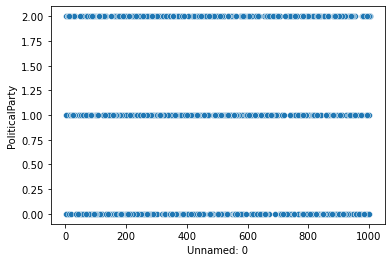

----------------------------------------
HHI


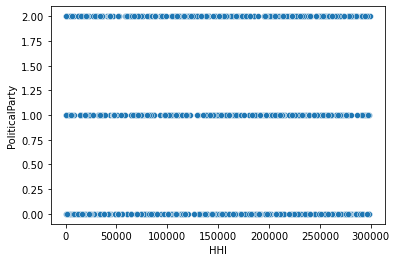

----------------------------------------
HHDL


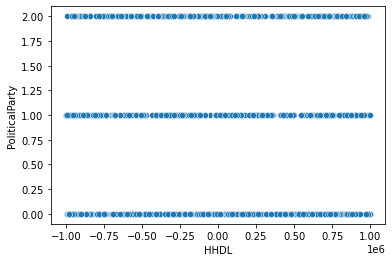

----------------------------------------
Married


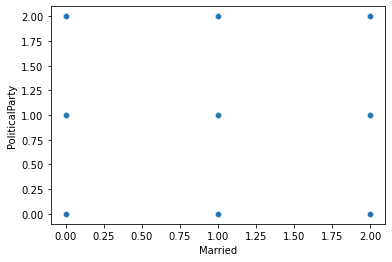

----------------------------------------
CollegGrads


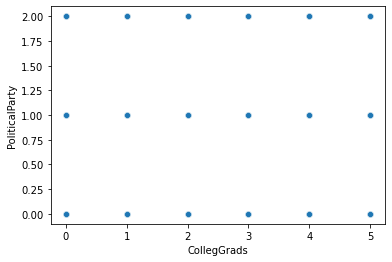

----------------------------------------
AHHAge


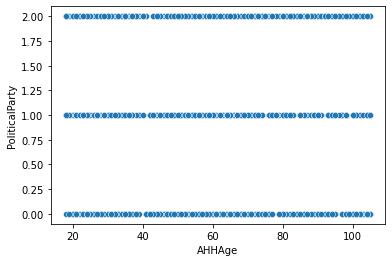

----------------------------------------
Cars


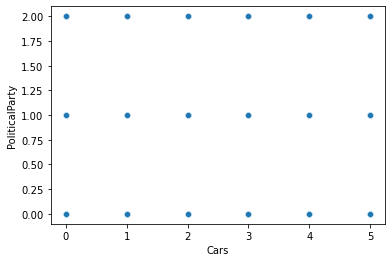

----------------------------------------
Filed in 2017


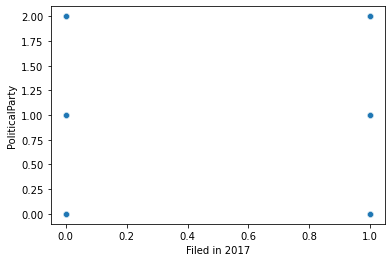

----------------------------------------
Filed in 2016


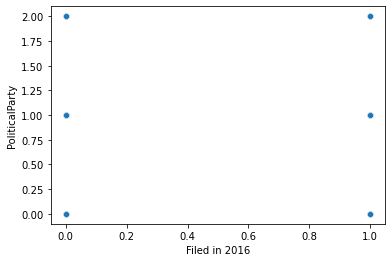

----------------------------------------
Filed in 2015


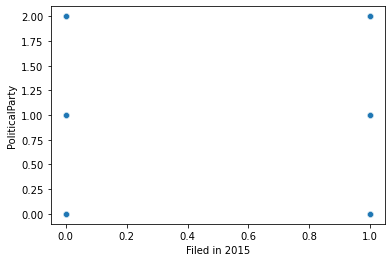

----------------------------------------
PoliticalParty


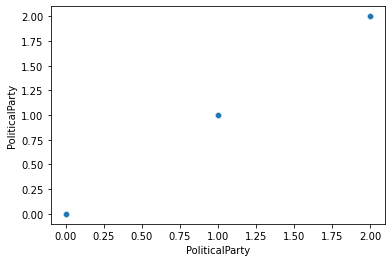

----------------------------------------


In [17]:
for i in tax_data:
    try:
        print(i)
        plt.figure()
        sns.scatterplot(data=tax_data,y="PoliticalParty",x=i)
        plt.show()
    except:
        pass
    print("----------------------------------------")

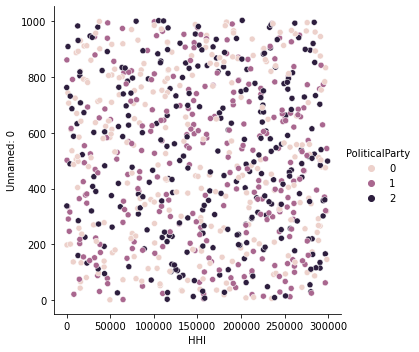

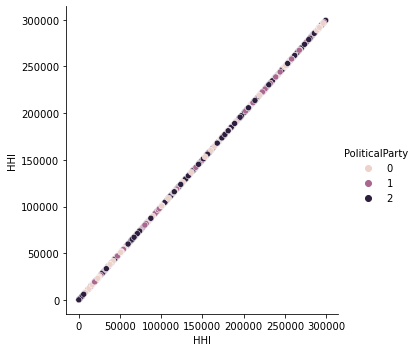

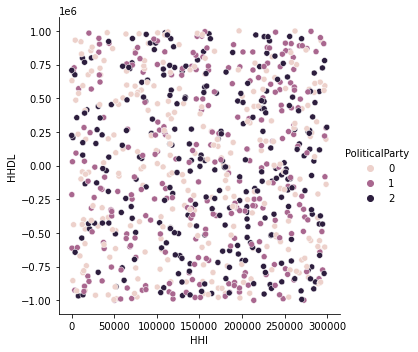

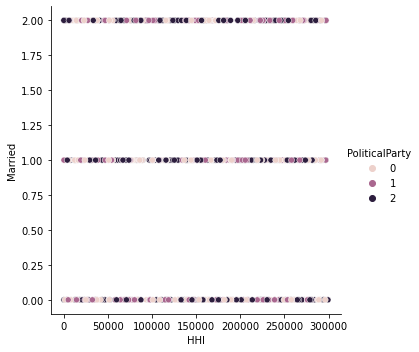

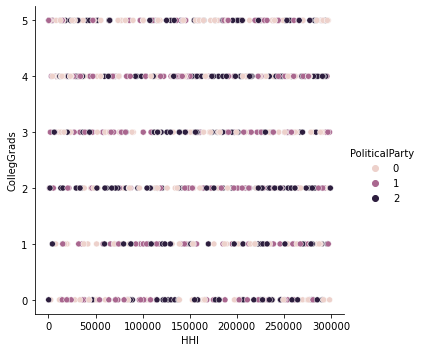

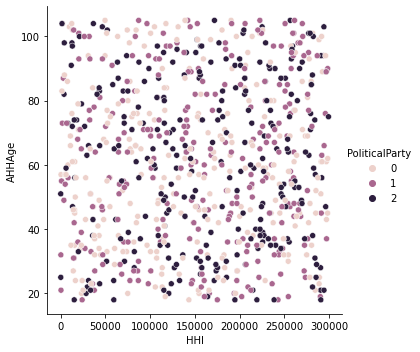

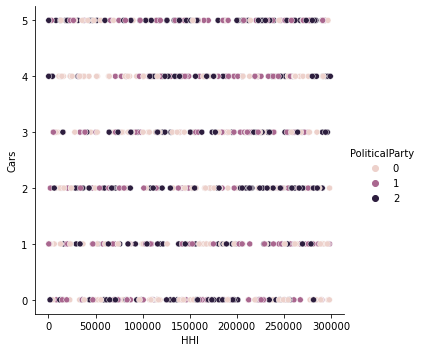

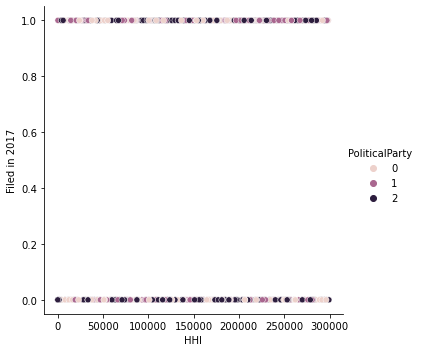

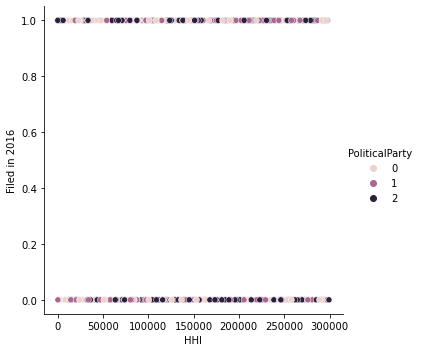

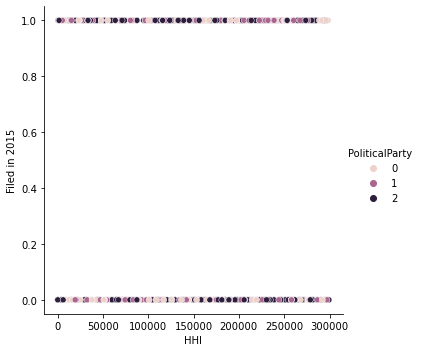

In [18]:
for i in tax_data.columns[:-1]:
    sns.relplot(x="HHI", y=i, hue="PoliticalParty", data=tax_data);
    plt.show()

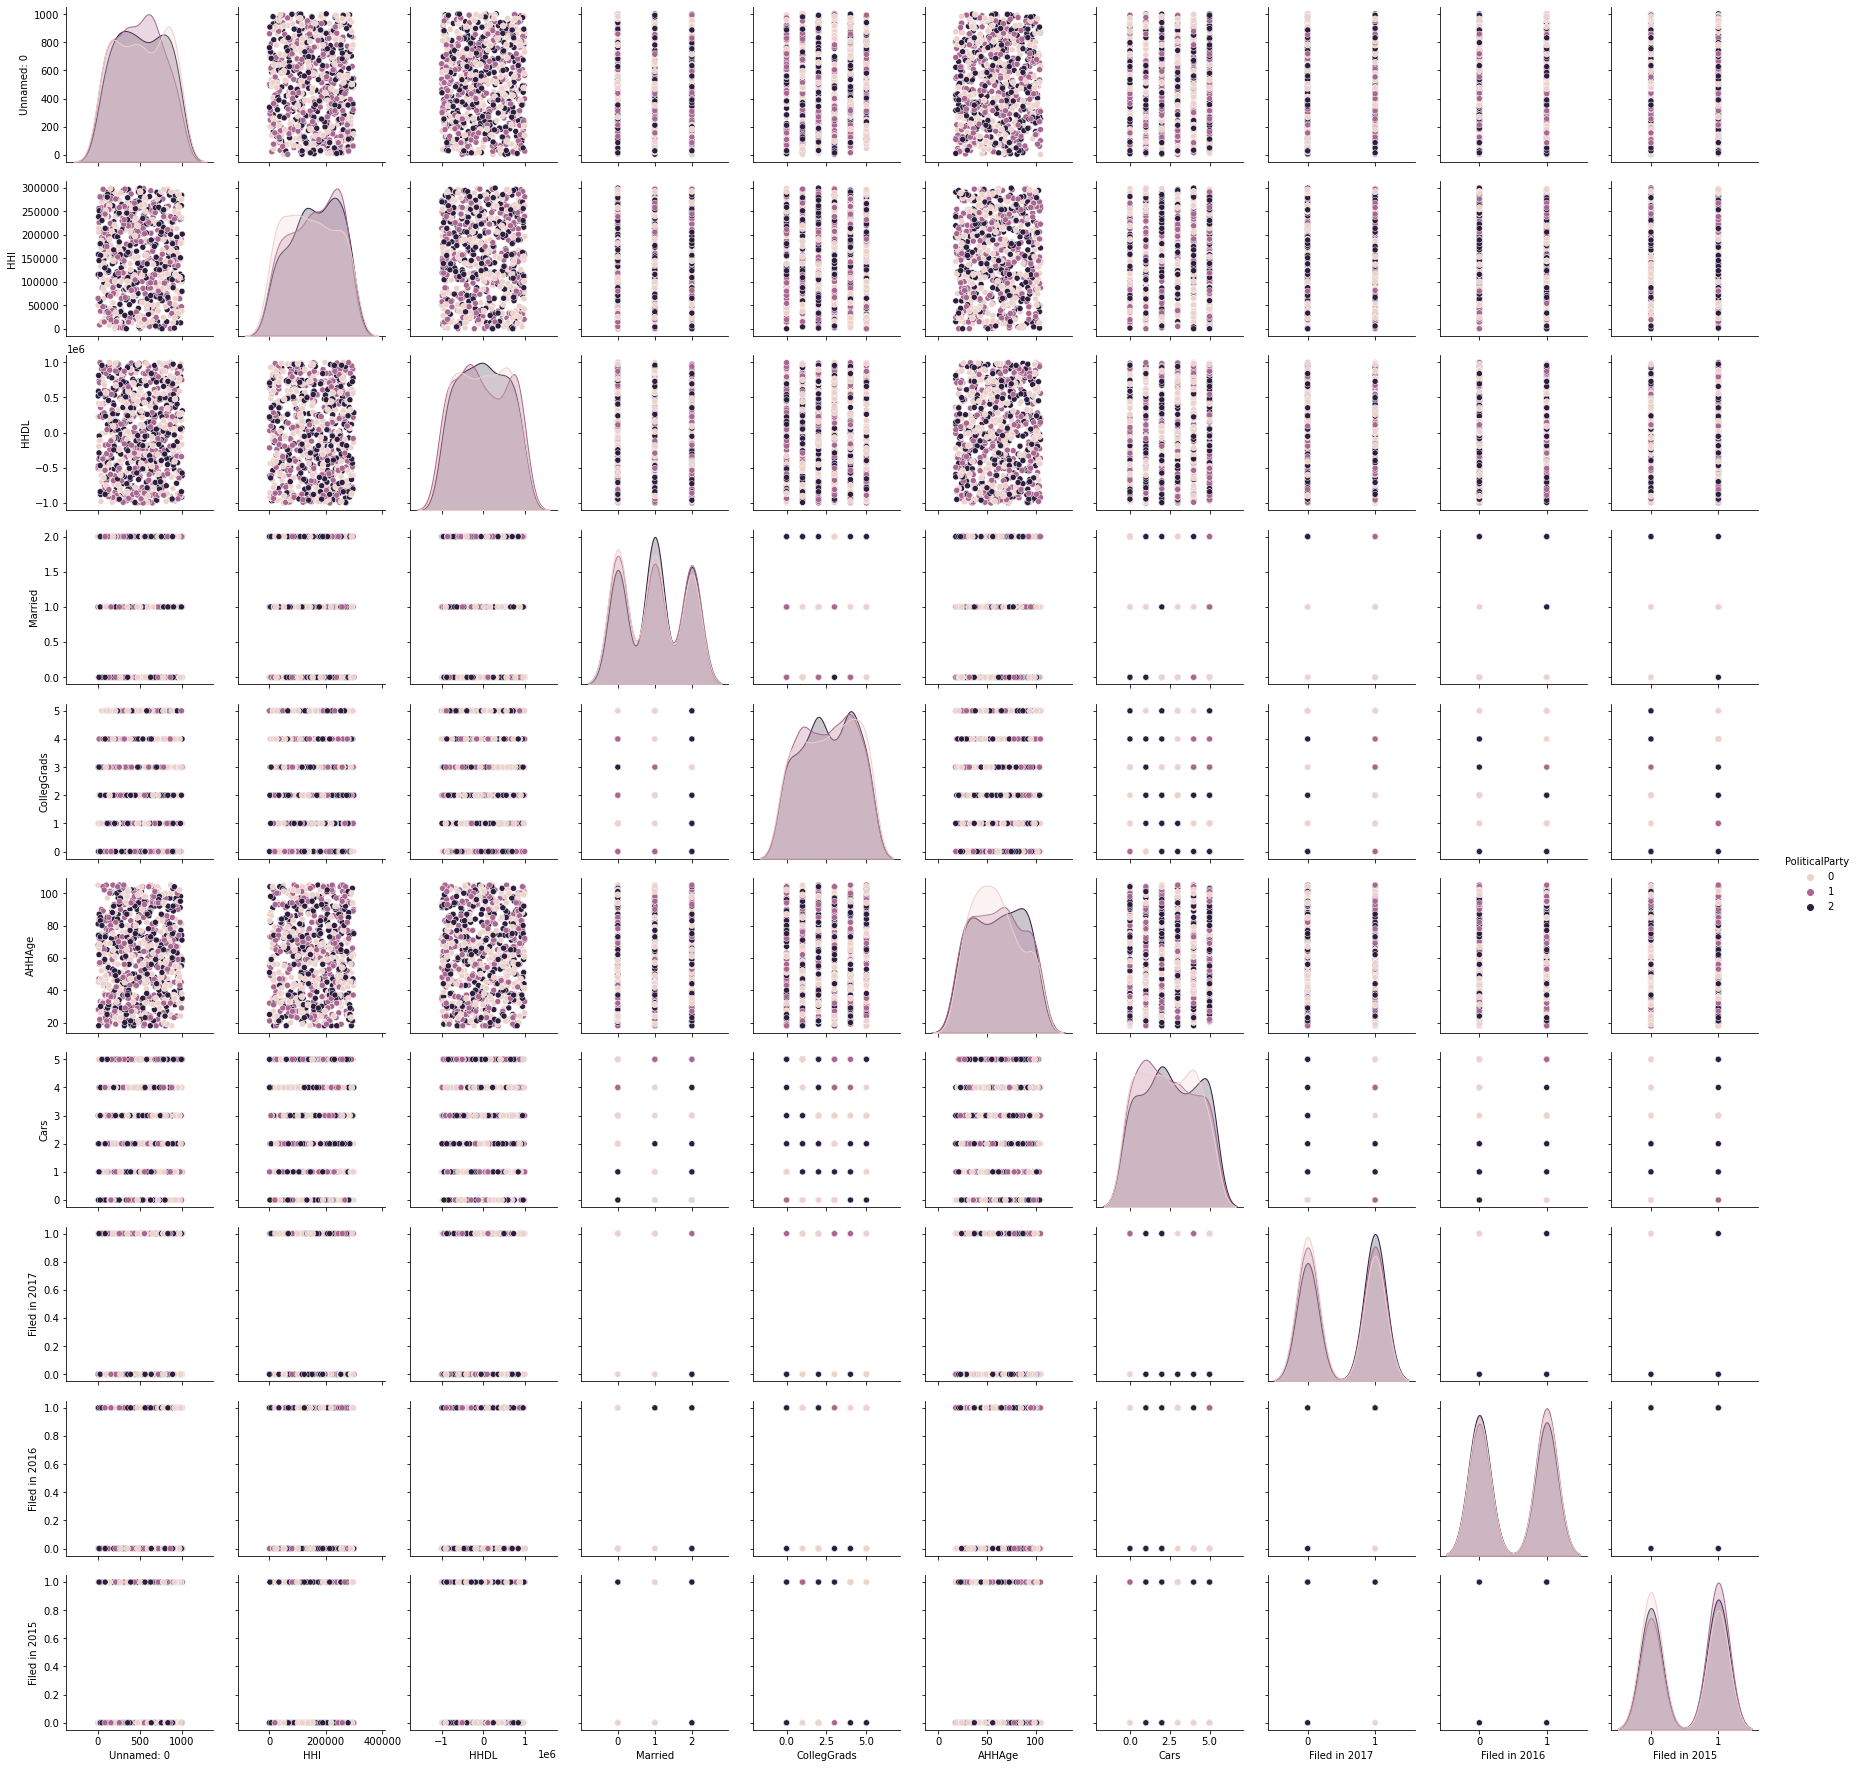

In [19]:
sns.pairplot(tax_data,hue='PoliticalParty');

### IDENTIFYING OUTLIERS

In [20]:
# calculate Q1 and Q3
Q1 = tax_data.quantile(0.25)
Q3 = tax_data.quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers = tax_data[((tax_data < (Q1 - 1.5 * IQR)) |(tax_data > (Q3 + 1.5 * IQR))).any(axis=1)]
IQR_outliers

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty


In [21]:
# calculate Q1 and Q3
Q1 =test_data.quantile(0.25)
Q3 = test_data.quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers = test_data[((test_data < (Q1 - 1.5 * IQR)) |(test_data > (Q3 + 1.5 * IQR))).any(axis=1)]
IQR_outliers

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015


### SKEWNESS

In [22]:
from scipy.stats import skew

Filed in 2015
-0.06728586703107811


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


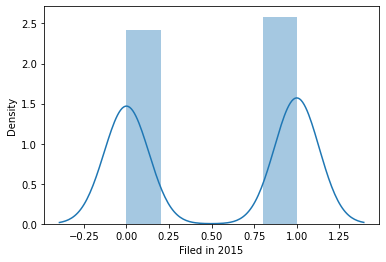

Filed in 2015
-0.06728586703107811


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


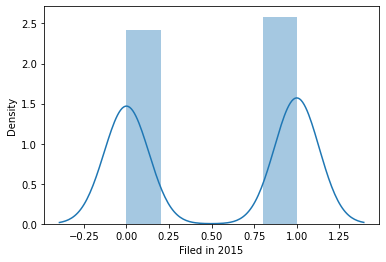

Filed in 2015
-0.06728586703107811


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


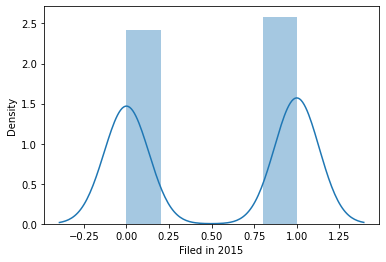

Filed in 2015
-0.06728586703107811


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


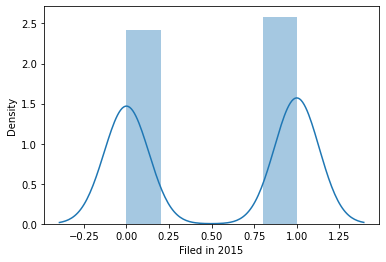

Filed in 2015
-0.06728586703107811


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


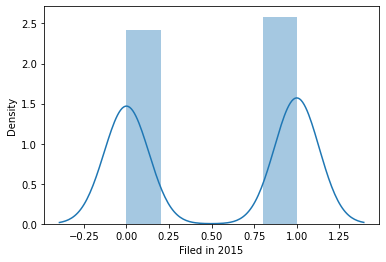

Filed in 2015
-0.06728586703107811


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


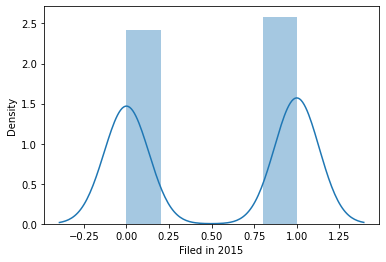

Filed in 2015
-0.06728586703107811


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


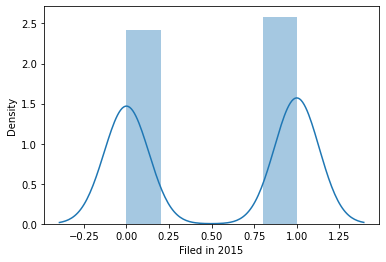

Filed in 2015
-0.06728586703107811


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


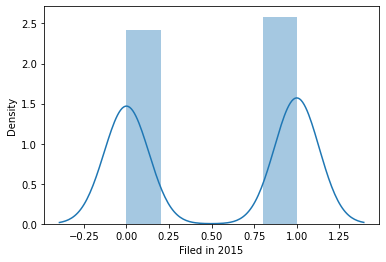

Filed in 2015
-0.06728586703107811


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


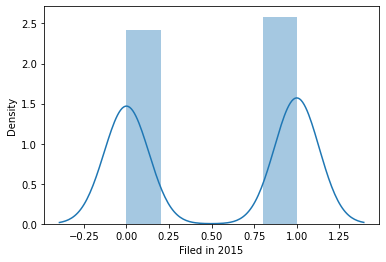

Filed in 2015
-0.06728586703107811


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


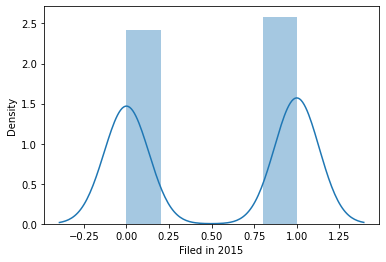

Filed in 2015
-0.06728586703107811


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


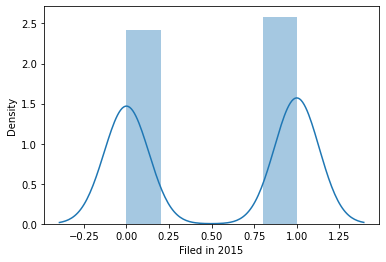

In [23]:
for I in tax_data:
    print(i)
    print(skew(tax_data[i]))
    
    plt.figure()
    sns.distplot(tax_data[i])
    plt.show()

### CHECKING THE CORRELATION WITH HEATMAP

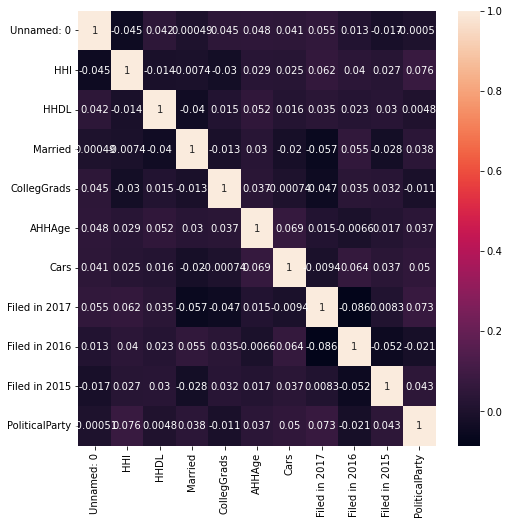

In [24]:
plt.figure(figsize=(8,8))
sns.heatmap(tax_data.corr(),annot=True)
plt.show()

# SEPERATING THE INDEPENDENT AND TARGET VARIABLE

In [25]:
X=tax_data.drop(['PoliticalParty','Unnamed: 0'],axis=1)
test_data=test_data.drop('Unnamed: 0',axis=1)
y=tax_data['PoliticalParty']

# DATA NORMALIZATION OR STANDARDIZATION

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [29]:
#minmax_scale =MinMaxScaler().fit(X)
#x_norm =pd.DataFrame(minmax_scale.transform(X),columns=X.columns)

std_scale =StandardScaler().fit(X)
x_std=pd.DataFrame(std_scale.transform(X),columns=X.columns)

#minmax_scale =MinMaxScaler().fit(test_data)
#test_norm = pd.DataFrame(minmax_scale.transform(test_data),columns=test_data.columns)

std_scale =StandardScaler().fit(test_data)
test_std = pd.DataFrame(std_scale.transform(test_data),columns=test_data.columns)

In [31]:

x_std

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,0.322956,0.004958,0.035650,-0.362938,-1.299476,-0.843396,-1.013794,-1.018858,0.966923
1,-0.295347,1.203070,1.280308,1.428697,0.097417,0.331360,-1.013794,-1.018858,-1.034209
2,1.302144,0.855331,1.280308,0.831485,-0.660896,-0.843396,0.986394,-1.018858,0.966923
3,1.557672,-0.702837,0.035650,-0.960150,-1.299476,1.506117,0.986394,-1.018858,0.966923
4,-0.752815,1.550883,0.035650,0.234274,-0.142050,1.506117,0.986394,0.981491,-1.034209
...,...,...,...,...,...,...,...,...,...
798,-0.024197,1.659781,-1.209007,-0.960150,1.534222,1.506117,0.986394,-1.018858,-1.034209
799,-0.216186,-0.284568,0.035650,-0.362938,-1.179742,0.331360,0.986394,-1.018858,-1.034209
800,-1.202949,-1.487711,0.035650,-0.960150,0.257062,0.918739,-1.013794,-1.018858,-1.034209
801,-0.365274,-0.060686,1.280308,-1.557362,-1.499032,0.918739,-1.013794,0.981491,0.966923


# SPLITTING THE DATASET INTO TRAIN AND TEST

In [203]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_std[['HHDL','HHI','AHHAge','CollegGrads','Filed in 2017','Filed in 2016','Married']],y,test_size = 0.2,random_state=21)

In [204]:
len(X_train)

642

In [205]:
len(X_test)

161

# MODEL

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from numpy.random import seed
seed(0)
from sklearn.metrics import accuracy_score

In [227]:
lg=LogisticRegression(max_iter=120)
rf=RandomForestClassifier(n_estimators=110)
#rf=RandomForestClassifier()
#dc=DecisionTreeClassifier(random_state=21,min_samples_split=20)
dc=DecisionTreeClassifier(criterion='gini',max_depth=14)
sv=SVC(  C=20,
    kernel='rbf',)
xg= XGBClassifier()
clf = CatBoostClassifier()
Ig=lgb.LGBMClassifier()
gu = GaussianNB()

# LOGISTIC REGRESSION

In [208]:
lg.fit(X_train,Y_train)
pred=lg.predict(X_test)
accuracy_score(Y_test,pred)
lg.score(X_test,Y_test)

0.32919254658385094

In [209]:
pred=lg.predict(test_std[['HHDL','HHI','AHHAge','CollegGrads','Filed in 2017','Filed in 2016','Married']])
df=pd.DataFrame({"prediction":pred})
df['label']=df['prediction'].replace({0:"Democrat",2:"Republican",1:"Independent"})
df1=pd.DataFrame({"prediction":df['label']})
df1.to_csv("log_predict.csv",index=False)

# RANDOMFOREST CLASSIFIER

In [228]:
rf.fit(X_train,Y_train)
rf.score(X_test,Y_test)


0.2981366459627329

In [229]:
pred=rf.predict(test_std[['HHDL','HHI','AHHAge','CollegGrads','Filed in 2017','Filed in 2016','Married']])
df=pd.DataFrame({"prediction":pred})
df['label']=df['prediction'].replace({0:"Democrat",2:"Republican",1:"Independent"})
df1=pd.DataFrame({"prediction":df['label']})
df1.to_csv("rf_predict.csv",index=False)


# DECISIONTREE CLASSIFIER

In [125]:
dc.fit(X_train,Y_train)
dc.score(X_test,Y_test)

0.3105590062111801

In [46]:
pred=dc.predict(test_std[['HHDL','HHI','AHHAge','CollegGrads','Filed in 2017','Filed in 2016','Married']])
df=pd.DataFrame({"prediction":pred})
df['label']=df['prediction'].replace({0:"Democrat",2:"Republican",1:"Independent"})
df1=pd.DataFrame({"prediction":df['label']})
df1.to_csv("dc_predict.csv",index=False)


# SUPPORT VECTOR

In [47]:
sv.fit(X_train,Y_train)
sv.score(X_test,Y_test)

0.32298136645962733

In [48]:
pred=sv.predict(test_data[['HHDL','HHI','AHHAge','CollegGrads','Filed in 2017','Filed in 2016','Married']])
df=pd.DataFrame({"prediction":pred})
df['label']=df['prediction'].replace({0:"Democrat",2:"Republican",1:"Independent"})
df1=pd.DataFrame({"prediction":df['label']})
df1.to_csv("sv_predict.csv",index=False)


# XGBOOST

In [49]:
xg.fit(X_train,Y_train)
xg.score(X_test,Y_test)

C:\Users\HP\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:43:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.36024844720496896

In [50]:
pred=xg.predict(test_data[['HHDL','HHI','AHHAge','CollegGrads','Filed in 2017','Filed in 2016','Married']])
df=pd.DataFrame({"prediction":pred})
df['label']=df['prediction'].replace({0:"Democrat",2:"Republican",1:"Independent"})
df1=pd.DataFrame({"prediction":df['label']})
df1.to_csv("xg_predict.csv",index=False)


# LIGHTGBM

In [51]:
Ig.fit(X_train,Y_train)
Ig.score(X_test,Y_test)

0.37888198757763975

In [52]:
pred=Ig.predict(test_data[['HHDL','HHI','AHHAge','CollegGrads','Filed in 2017','Filed in 2016','Married']])
df=pd.DataFrame({"prediction":pred})
df['label']=df['prediction'].replace({0:"Democrat",2:"Republican",1:"Independent"})
df1=pd.DataFrame({"prediction":df['label']})
df1.to_csv("Ig_predict.csv",index=False)


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
#Hyperparameter tuning of sgd with log loss(i.e logistic regression).

grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    'max_iter': [100,500,1000], 
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    }

sgd=SGDClassifier()
sgd_cv=GridSearchCV(sgd,grid,cv=10,n_jobs=5,verbose=10)
sgd_cv.fit(X_train,Y_train)
print("tuned hyperparameters :(best parameters) ",sgd_cv.best_params_)
print("accuracy :",sgd_cv.best_score_)

sgd = SGDClassifier(alpha = 0.0001, loss ='log', max_iter = 100, penalty = 'l2')
sgd.fit(X_train,Y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
tuned hyperparameters :(best parameters)  {'alpha': 0.1, 'loss': 'log', 'max_iter': 100, 'penalty': 'l2'}
accuracy : 0.3724278846153846


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', max_iter=100)

In [54]:
sgd.score(X_test,Y_test)

0.2795031055900621

In [55]:
pred=sgd.predict(test_data[['HHDL','HHI','AHHAge','CollegGrads','Filed in 2017','Filed in 2016','Married']])
df=pd.DataFrame({"prediction":pred})
df['label']=df['prediction'].replace({0:"Democrat",2:"Republican",1:"Independent"})
df1=pd.DataFrame({"prediction":df['label']})
df1.to_csv("sgd_predict.csv",index=False)

# CATBOOST

In [56]:
#clf.fit(X_train,Y_train)
#clf.score(X_test,Y_test)

In [57]:
#pred=clf.predict(test_data[['HHDL','HHI','AHHAge','CollegGrads','Filed in 2017','Filed in 2016','Married']])
#df=pd.DataFrame({"prediction":pred})
#df['label']=df['prediction'].replace({0:"Democrat",2:"Republican",1:"Independent"})
#df1=pd.DataFrame({"prediction":df['label']})
#df1.to_csv("clf_predict.csv",index=False)


# HYPERPARAMETER TUNING

In [226]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [224]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators':np.arange(10,210,10)

        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}

    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [225]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.364535,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.366037,{'n_estimators': 110}
2,logistic_regression,0.345773,{'C': 1}
3,naive_bayes_gaussian,0.342660,{}
4,decision_tree,0.336410,{'criterion': 'gini'}


In [135]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)

param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestClassifier()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [136]:
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [137]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 5, 'n_estimators': 140} with a score of 0.37
